### S&P vs M1 vs Gold
* https://fred.stlouisfed.org/series/M1SL
* https://fred.stlouisfed.org/graph/?g=eiGR

In [1]:
import numpy as np
import pandas as pd
import datetime
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
month_map = {"Jan": '01', "Feb": '02', "Mar": '03', "Apr": '04', "May": '05', "Jun": '06',
             "Jul": '07', "Aug": '08', "Sep": '09', "Oct": '10', "Nov": '11', "Dec": '12'}

In [3]:
def formatDates(arr,date_format="%Y-%m-%d %H:%M"):
    return [datetime.datetime.strptime(d, date_format) for d in arr]

def stripCharacter(arr,c,r=''):
    return [e.replace(c, r) for e in arr]

def str2Float(arr):   
    res = np.zeros(len(arr))
    for k in range(len(arr)):  
        try: 
            res[k] = float(arr[k]) 
        except: 
            res[k] = np.nan   
    return res

def getDate(t, strt_date):
    return datetime.datetime.strptime(strt_date, "%Y-%m-%d") + datetime.timedelta(days=t) 

def imputeArr(arr):
    arr = pd.Series(list(arr)).interpolate(method='linear')
    return np.array(arr)

def convertDateArr(arr):
    return [convertDate(d) for d in arr]

def convertDate(val):
    d = val.split(' ')
    d = [d[2],month_map[d[0]],d[1]]    
    return '-'.join(d)

In [4]:
M1_supply = pd.read_csv('../resources/M1_supply.csv')
gold_prices = pd.read_csv('../resources/gold_prices.csv')

In [5]:
sp500_index = pd.read_csv('../resources/sp500_index.csv')
sp500_index = sp500_index.assign(date = stripCharacter(sp500_index['date'].values,','))
sp500_index['date'] = convertDateArr(sp500_index['date'].values)
sp500_index['date'] = formatDates(sp500_index['date'].values,date_format="%Y-%m-%d")
for colnm in sp500_index.columns[1:]:
    arr = np.array(stripCharacter(sp500_index[colnm].values,','))
    arr = str2Float(arr)
    sp500_index[colnm] = arr

sp500_index.reset_index(drop=True, inplace=True)
sp500_index = sp500_index.sort_values(by='date')
sp500_index.reset_index(drop=True, inplace=True)
sp500_index.head(5)

,date,open,high,low,close,adj_close,volume
0,1959-01-02,55.44,55.44,55.44,55.44,55.44,3380000.0
1,1959-01-05,55.66,55.66,55.66,55.66,55.66,4210000.0
2,1959-01-06,55.59,55.59,55.59,55.59,55.59,3690000.0
3,1959-01-07,54.89,54.89,54.89,54.89,54.89,4140000.0
4,1959-01-08,55.40,55.40,55.40,55.40,55.40,4030000.0


In [6]:
M1_supply = pd.read_csv('../resources/M1_supply.csv')
M1_supply.rename(columns = {'DATE':'date'}, inplace = True)
M1_supply.rename(columns = {'M1SL':'M1'}, inplace = True)
M1_supply['date'] = formatDates(M1_supply['date'].values,date_format="%Y-%m-%d")
M1_supply.head(5)

,date,M1
0,1959-01-01,138.9
1,1959-02-01,139.4
2,1959-03-01,139.7
3,1959-04-01,139.7
4,1959-05-01,140.7


In [7]:
gold_prices = pd.read_csv('../resources/gold_prices.csv')
gold_prices.rename(columns = {'DATE':'date'}, inplace = True)
gold_prices.rename(columns = {'GOLDPMGBD228NLBM':'price'}, inplace = True)
gold_prices['price'] = str2Float(gold_prices['price'].values)
gold_prices['price'] = imputeArr(gold_prices['price'].values)
gold_prices['date'] = formatDates(gold_prices['date'].values,date_format="%Y-%m-%d")
gold_prices.drop('EFFR', axis=1, inplace=True)
gold_prices.head(5)

,date,price
0,1968-04-01,37.70
1,1968-04-02,37.30
2,1968-04-03,37.60
3,1968-04-04,36.95
4,1968-04-05,37.00


In [8]:
M1_supply.values[612][0]

Timestamp('2010-01-01 00:00:00')

In [9]:
g_pt0 = 880     # off the gold standard Aug 1971
g_pt1 = -3468   # prior to crash of Sept 2008
g_pt2 = -475   # prior to pandemic March 2020
g_pt3 = -54   # prior to pandemic Oct 2021

sp_pt0 = 3152     # off the gold standard Aug 1971
sp_pt1 = -3344  # prior to crash of Sept 2008
sp_pt2 = -460   # prior to pandemic March 2020
sp_pt3 = -51   # prior to pandemic Oct 2021

m1_pt0 = 151     # off the gold standard Aug 1971
m1_pt1 = -158  # prior to crash of Sept 2008
m1_pt2 = -20   # prior to pandemic March 2020
m1_pt3 = -1   # prior to pandemic Oct 2021

Text(0, 0.5, 'SP500')

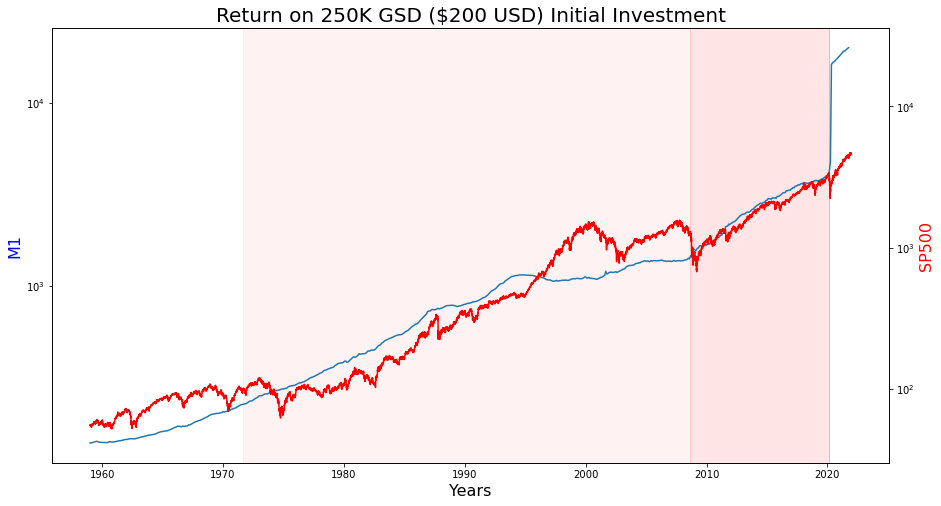

In [10]:
date_pt1 = gold_prices['date'].values[g_pt0]
date_pt2 = gold_prices['date'].values[g_pt1]
date_pt3 = gold_prices['date'].values[g_pt2]
date_pt4 = gold_prices['date'].values[g_pt3]

m1_dates = M1_supply['date'].values
sp500_dates = sp500_index['date'].values
gold_dates = gold_prices['date'].values

fig, m1_ax = plt.subplots(figsize=(15, 8))

m1_ax.set_yscale('log', subs=[1])
m1_ax.plot(m1_dates, M1_supply['M1'].values, label='USD (unadjusted)')
m1_ax.set_title("Return on 250K GSD ($200 USD) Initial Investment", fontsize=20)
m1_ax.set_ylabel("M1", fontsize=16,color='blue')
m1_ax.set_xlabel("Years", fontsize=16)
m1_ax.axvspan(date_pt1, date_pt2, alpha=0.05, color='red')
m1_ax.axvspan(date_pt2, date_pt3, alpha=0.1, color='red')
m1_ax.axvspan(date_pt3, date_pt3, alpha=0.2, color='red')

sp500_ax = m1_ax.twinx()
sp500_ax.set_yscale('log', subs=[1])
sp500_ax.plot(sp500_dates, sp500_index['close'].values, label='Gold Backing (units)',color='red')
sp500_ax.set_ylim(bottom=30,top=36000)
sp500_ax.set_ylabel("SP500", fontsize=16,color='red')


Text(0, 0.5, 'Gold Backing (USD)')

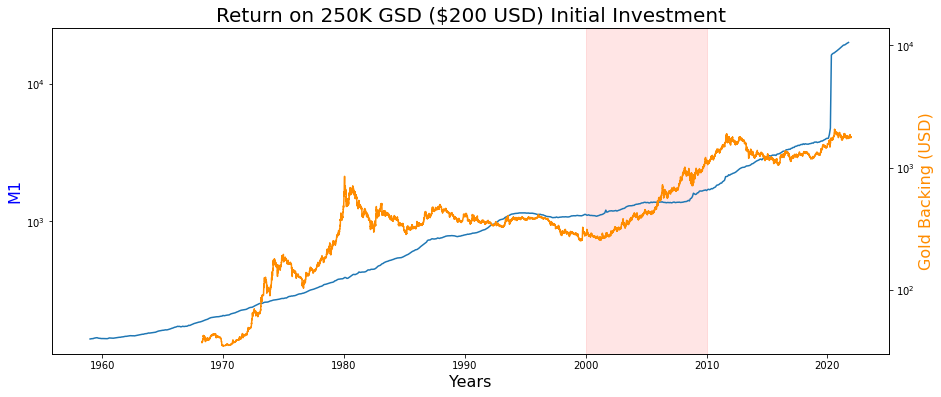

In [11]:
m1_dates = M1_supply['date'].values
gold_dates = gold_prices['date'].values

fig, m1_ax = plt.subplots(figsize=(15, 6))

m1_ax.set_yscale('log', subs=[1])

m1_ax.set_title("Return on 250K GSD ($200 USD) Initial Investment", fontsize=20)
m1_ax.set_ylabel("M1", fontsize=16,color='blue')
m1_ax.set_xlabel("Years", fontsize=16)
m1_ax.plot(m1_dates, M1_supply['M1'].values, label='USD (unadjusted)')
m1_ax.axvspan(M1_supply.values[492][0], M1_supply.values[612][0], alpha=0.1, color='red')

gold_ax = m1_ax.twinx()
gold_ax.set_yscale('log', subs=[1])
gold_ax.plot(gold_dates, gold_prices['price'].values, label='Gold Backing (units)',color='darkorange')
gold_ax.set_ylim(bottom=30,top=14000)
gold_ax.set_ylabel("Gold Backing (USD)", fontsize=16,color='darkorange')


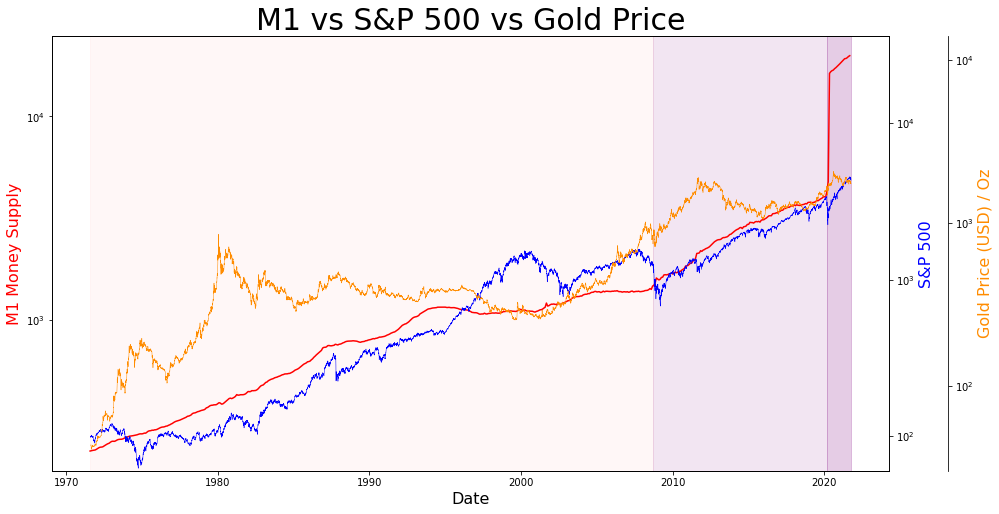

In [12]:
m1_dates = M1_supply['date'].values[m1_pt0:m1_pt3]
sp500_dates = sp500_index['date'].values[sp_pt0:sp_pt3]
gold_dates = gold_prices['date'].values[g_pt0:g_pt3]

m1_supply = M1_supply['M1'].values[m1_pt0:m1_pt3]
sp500 = sp500_index['close'].values[sp_pt0:sp_pt3]
gold = gold_prices['price'].values[g_pt0:g_pt3]

fig, m1_ax = plt.subplots(figsize=(15, 8))

m1_ax.set_yscale('log', subs=[1])
m1_ax.plot(m1_dates, m1_supply, color='red', linewidth=1.5)
m1_ax.set_title("M1 vs S&P 500 vs Gold Price", fontsize=30)
m1_ax.set_ylabel("M1 Money Supply", fontsize=16,color='red')
m1_ax.set_xlabel("Date", fontsize=16)
m1_ax.axvspan( M1_supply['date'].values[m1_pt0], M1_supply['date'].values[m1_pt1], 
              alpha=0.03, color='red')
m1_ax.axvspan( M1_supply['date'].values[m1_pt1], M1_supply['date'].values[m1_pt2], 
              alpha=0.1, color='purple')
m1_ax.axvspan( M1_supply['date'].values[m1_pt2], M1_supply['date'].values[m1_pt3], 
              alpha=0.2, color='purple')

sp500_ax = m1_ax.twinx()
sp500_ax.set_yscale('log', subs=[1])
sp500_ax.plot(sp500_dates, sp500, color='blue', linewidth=0.5)
sp500_ax.set_ylim(bottom=60,top=36000)
sp500_ax.set_ylabel("S&P 500", fontsize=16,color='blue')

gold_ax = m1_ax.twinx()
gold_ax.spines['right'].set_position(("axes", 1.07))
gold_ax.set_yscale('log', subs=[1])
gold_ax.plot(gold_dates, gold, color='darkorange', linewidth=0.5)
gold_ax.set_ylim(bottom=30,top=14000)
gold_ax.set_ylabel("Gold Price (USD) / Oz", fontsize=16,color='darkorange')
fig.savefig('../img/gold_m1_sp500.png')

In [13]:
gold_start_date = str(gold_prices['date'].values[g_pt0].astype('M8[D]'))
sp500_start_date = str(sp500_index['date'].values[sp_pt0].astype('M8[D]'))
M1_start_date = str(M1_supply['date'].values[m1_pt0].astype('M8[D]'))

gold_end_date = str(gold_prices['date'].values[g_pt1].astype('M8[D]'))
sp500_end_date = str(sp500_index['date'].values[sp_pt1].astype('M8[D]'))
M1_end_date = str(M1_supply['date'].values[m1_pt1].astype('M8[D]'))

pG = 100*(gold_prices['price'].values[g_pt1] - gold_prices['price'].values[g_pt0])/gold_prices['price'].values[g_pt0]
pSP = 100*(sp500_index['close'].values[sp_pt1] - sp500_index['close'].values[sp_pt0])/sp500_index['close'].values[sp_pt0]
pM1 = 100*(M1_supply['M1'].values[m1_pt1] - M1_supply['M1'].values[m1_pt0])/M1_supply['M1'].values[m1_pt0]

print('Gold {} -> {} {:.1f}'.format(gold_start_date, gold_end_date, pG))
print('SP500 {} -> {} {:.1f}'.format(sp500_start_date, sp500_end_date, pSP))
print('M1 {} -> {} {:.1f}'.format(M1_start_date, M1_end_date, pM1))


Gold 1971-08-16 -> 2008-09-01 1811.1
SP500 1971-08-16 -> 2008-09-03 1191.0
M1 1971-08-01 -> 2008-09-01 548.0


In [14]:
gold_start_date = str(gold_prices['date'].values[g_pt0].astype('M8[D]'))
sp500_start_date = str(sp500_index['date'].values[sp_pt0].astype('M8[D]'))
M1_start_date = str(M1_supply['date'].values[m1_pt0].astype('M8[D]'))

gold_end_date = str(gold_prices['date'].values[g_pt2].astype('M8[D]'))
sp500_end_date = str(sp500_index['date'].values[sp_pt2].astype('M8[D]'))
M1_end_date = str(M1_supply['date'].values[m1_pt2].astype('M8[D]'))

pG = 100*(gold_prices['price'].values[g_pt2] - gold_prices['price'].values[g_pt0])/gold_prices['price'].values[g_pt0]
pSP = 100*(sp500_index['close'].values[sp_pt2] - sp500_index['close'].values[sp_pt0])/sp500_index['close'].values[sp_pt0]
pM1 = 100*(M1_supply['M1'].values[m1_pt2] - M1_supply['M1'].values[m1_pt0])/M1_supply['M1'].values[m1_pt0]

print('Gold {} -> {} {:.1f}'.format(gold_start_date, gold_end_date, pG))
print('SP500 {} -> {} {:.1f}'.format(sp500_start_date, sp500_end_date, pSP))
print('M1 {} -> {} {:.1f}'.format(M1_start_date, M1_end_date, pM1))


Gold 1971-08-16 -> 2020-02-20 3662.9
SP500 1971-08-16 -> 2020-02-19 3328.7
M1 1971-08-01 -> 2020-03-01 1797.7


In [15]:
gold_start_date = str(gold_prices['date'].values[g_pt0].astype('M8[D]'))
sp500_start_date = str(sp500_index['date'].values[sp_pt0].astype('M8[D]'))
M1_start_date = str(M1_supply['date'].values[m1_pt0].astype('M8[D]'))

gold_end_date = str(gold_prices['date'].values[g_pt3].astype('M8[D]'))
sp500_end_date = str(sp500_index['date'].values[sp_pt3].astype('M8[D]'))
M1_end_date = str(M1_supply['date'].values[m1_pt3].astype('M8[D]'))

pG = 100*(gold_prices['price'].values[g_pt3] - gold_prices['price'].values[g_pt0])/gold_prices['price'].values[g_pt0]
pSP = 100*(sp500_index['close'].values[sp_pt3] - sp500_index['close'].values[sp_pt0])/sp500_index['close'].values[sp_pt0]
pM1 = 100*(M1_supply['M1'].values[m1_pt3] - M1_supply['M1'].values[m1_pt0])/M1_supply['M1'].values[m1_pt0]

print('Gold {} -> {} {:.1f}'.format(gold_start_date, gold_end_date, pG))
print('SP500 {} -> {} {:.1f}'.format(sp500_start_date, sp500_end_date, pSP))
print('M1 {} -> {} {:.1f}'.format(M1_start_date, M1_end_date, pM1))


Gold 1971-08-16 -> 2021-10-01 3983.8
SP500 1971-08-16 -> 2021-10-01 4311.7
M1 1971-08-01 -> 2021-10-01 8802.1


In [16]:
gold_start_date = str(gold_prices['date'].values[g_pt1].astype('M8[D]'))
sp500_start_date = str(sp500_index['date'].values[sp_pt1].astype('M8[D]'))
M1_start_date = str(M1_supply['date'].values[m1_pt1].astype('M8[D]'))

gold_end_date = str(gold_prices['date'].values[g_pt2].astype('M8[D]'))
sp500_end_date = str(sp500_index['date'].values[sp_pt2].astype('M8[D]'))
M1_end_date = str(M1_supply['date'].values[m1_pt2].astype('M8[D]'))

pG = 100*(gold_prices['price'].values[g_pt2] - gold_prices['price'].values[g_pt1])/gold_prices['price'].values[g_pt1]
pSP = 100*(sp500_index['close'].values[sp_pt2] - sp500_index['close'].values[sp_pt1])/sp500_index['close'].values[sp_pt1]
pM1 = 100*(M1_supply['M1'].values[m1_pt2] - M1_supply['M1'].values[m1_pt1])/M1_supply['M1'].values[m1_pt1]

print('Gold {} -> {} {:.1f}'.format(gold_start_date, gold_end_date, pG))
print('SP500 {} -> {} {:.1f}'.format(sp500_start_date, sp500_end_date, pSP))
print('M1 {} -> {} {:.1f}'.format(M1_start_date, M1_end_date, pM1))


Gold 2008-09-01 -> 2020-02-20 96.9
SP500 2008-09-03 -> 2020-02-19 165.6
M1 2008-09-01 -> 2020-03-01 192.8


In [17]:
gold_start_date = str(gold_prices['date'].values[g_pt2].astype('M8[D]'))
sp500_start_date = str(sp500_index['date'].values[sp_pt2].astype('M8[D]'))
M1_start_date = str(M1_supply['date'].values[m1_pt2].astype('M8[D]'))

gold_end_date = str(gold_prices['date'].values[g_pt3].astype('M8[D]'))
sp500_end_date = str(sp500_index['date'].values[sp_pt3].astype('M8[D]'))
M1_end_date = str(M1_supply['date'].values[m1_pt3].astype('M8[D]'))

pG = 100*(gold_prices['price'].values[g_pt3] - gold_prices['price'].values[g_pt2])/gold_prices['price'].values[g_pt2]
pSP = 100*(sp500_index['close'].values[sp_pt3] - sp500_index['close'].values[sp_pt2])/sp500_index['close'].values[sp_pt2]
pM1 = 100*(M1_supply['M1'].values[m1_pt3] - M1_supply['M1'].values[m1_pt2])/M1_supply['M1'].values[m1_pt2]

print('Gold {} -> {} {:.1f}'.format(gold_start_date, gold_end_date, pG))
print('SP500 {} -> {} {:.1f}'.format(sp500_start_date, sp500_end_date, pSP))
print('M1 {} -> {} {:.1f}'.format(M1_start_date, M1_end_date, pM1))


Gold 2020-02-20 -> 2021-10-01 8.5
SP500 2020-02-19 -> 2021-10-01 28.7
M1 2020-03-01 -> 2021-10-01 369.1
